<a href="https://colab.research.google.com/github/Anzhir/simple_projects/blob/master/Custom_Images_classification_%26_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 94% 82.0M/86.8M [00:04<00:00, 24.6MB/s]
100% 86.8M/86.8M [00:04<00:00, 18.7MB/s]


In [3]:
!unzip /content/brain-tumor-classification-mri.zip

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [ ]:
#we will only take  "meningioma_tumor and no_tumor"

In [29]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory

train_gen=ImageDataGenerator(
rescale=1./255,
    vertical_flip=True,    horizontal_flip=True,
    rotation_range=30).flow_from_directory(
    '/content/train_folder',
    target_size=(64, 64),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32,
    shuffle=True
)

Found 1217 images belonging to 2 classes.


In [30]:
test_gen=ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/test_folder',
    target_size=(64, 64),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32,
    shuffle=True
)

Found 220 images belonging to 2 classes.


No Tumor


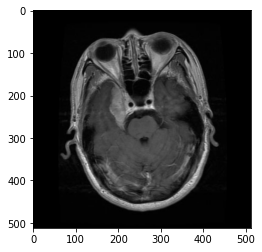

In [33]:
import matplotlib.pyplot as plt
print("No Tumor")
img=plt.imread('/content/train_folder/meningioma_tumor/m (103).jpg')
plt.imshow(img)

Brain Tumor


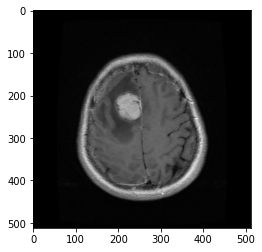

In [37]:
print("Brain Tumor")
img2=plt.imread('/content/train_folder/meningioma_tumor/m (121).jpg')
plt.imshow(img2)

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dropout , Dense
model = Sequential()
model.add(Conv2D(32,kernel_size = (2,2),strides = (1,1),activation = 'linear' ,input_shape = (64,64,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 63, 63, 32)        160       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 30, 30, 64)        8256      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 256)        

In [49]:
model.compile(optimizer = 'rmsprop' ,loss = "binary_crossentropy",metrics = ['accuracy'])

In [50]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early=EarlyStopping(monitor='accuracy' , patience=2,mode='auto')
checks=ModelCheckpoint('/content/MyModel' , save_best_only=True , monitor='accuracy')

In [51]:
history=model.fit(train_gen,epochs=30,callbacks=[early,checks])

Epoch 1/30
39/39 [==============================] - 7s 138ms/step - loss: 0.7009 - accuracy: 0.5818
INFO:tensorflow:Assets written to: /content/MyModel/assets
Epoch 2/30
39/39 [==============================] - 5s 139ms/step - loss: 0.5934 - accuracy: 0.6919
INFO:tensorflow:Assets written to: /content/MyModel/assets
Epoch 3/30
39/39 [==============================] - 5s 139ms/step - loss: 0.5363 - accuracy: 0.7197
INFO:tensorflow:Assets written to: /content/MyModel/assets
Epoch 4/30
39/39 [==============================] - 5s 139ms/step - loss: 0.4534 - accuracy: 0.7560
INFO:tensorflow:Assets written to: /content/MyModel/assets
Epoch 5/30
39/39 [==============================] - 5s 139ms/step - loss: 0.3761 - accuracy: 0.8140
INFO:tensorflow:Assets written to: /content/MyModel/assets
Epoch 6/30
39/39 [==============================] - 5s 140ms/step - loss: 0.3870 - accuracy: 0.8263
INFO:tensorflow:Assets written to: /content/MyModel/assets
Epoch 7/30
39/39 [============================

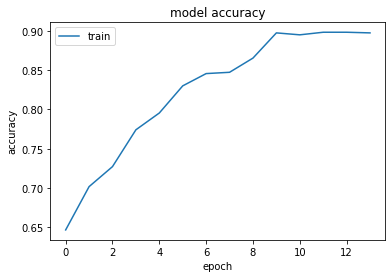

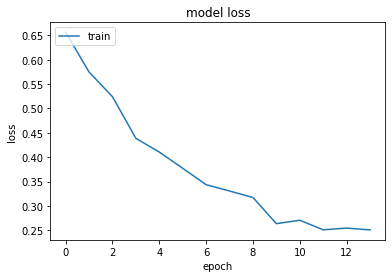

In [52]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
model.evaluate(test_gen)

7/7 [==============================] - 1s 80ms/step - loss: 0.3804 - accuracy: 0.8591


[0.38037994503974915, 0.8590909242630005]